In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('인천교통공사_역별일별 이용인원현황_20230630.csv', encoding='cp949')

In [3]:
data2=data[data['구분']=='하차']
data3=data2.drop(['호선','구분'], axis=1,inplace=True)

C:\Users\tj-bu\AppData\Local\Temp\ipykernel_8024\3427451468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3=data2.drop(['호선','구분'], axis=1,inplace=True)


In [4]:
df=data2[data2['역명']=='계양']
df.drop('역명',axis=1,inplace=True)

C:\Users\tj-bu\AppData\Local\Temp\ipykernel_8024\844010428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('역명',axis=1,inplace=True)


In [ ]:
list1=data2['역명'].unique().

In [27]:
list1=data2['역명'].unique().data

In [28]:
list1

['계양',
 '귤현',
 '박촌',
 '임학',
 '계산',
 '경인교대입구',
 '작전',
 '갈산',
 '부평구청',
 '부평시장',
 '부평',
 '동수',
 '부평삼거리',
 '간석오거리',
 '인천시청',
 '예술회관',
 '인천터미널',
 '문학경기장',
 '선학',
 '신연수',
 '원인재',
 '동춘',
 '동막',
 '캠퍼스타운',
 '테크노파크',
 '지식정보단지',
 '인천대입구',
 '센트럴파크',
 '국제업무지구',
 '송도달빛축제공원',
 '검단오류',
 '왕길',
 '검단사거리',
 '마전',
 '완정',
 '독정',
 '검암',
 '검바위',
 '아시아드경기장',
 '서구청',
 '가정',
 '가정중앙시장',
 '석남',
 '서부여성회관',
 '인천가좌',
 '가재울',
 '주안국가산단',
 '주안',
 '시민공원',
 '석바위시장',
 '석천사거리',
 '모래내시장',
 '만수',
 '남동구청',
 '인천대공원',
 '운연',
 '까치울',
 '부천종합운동장',
 '춘의',
 '신중동',
 '부천시청',
 '상동',
 '삼산체육관',
 '굴포천',
 '7호선 부평구청',
 '산곡']

In [5]:
plt = data_rPdid.plot(x="통행일자", y="이용인원", figsize=(15, 5))

NameError: name 'data_rPdid' is not defined

In [6]:
#ds
df['ds']=pd.to_datetime(df['통행일자'])
df['y']=df['이용인원']
df.drop(['통행일자','이용인원'],axis=1,inplace=True)

C:\Users\tj-bu\AppData\Local\Temp\ipykernel_8024\985552592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds']=pd.to_datetime(df['통행일자'])
C:\Users\tj-bu\AppData\Local\Temp\ipykernel_8024\985552592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y']=df['이용인원']
C:\Users\tj-bu\AppData\Local\Temp\ipykernel_8024\985552592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [7]:
df

ds     y
1   2022-07-01  3307
3   2022-07-02  2862
5   2022-07-03  2325
7   2022-07-04  3309
9   2022-07-05  3368
..         ...   ...
721 2023-06-26  3534
723 2023-06-27  3928
725 2023-06-28  3970
727 2023-06-29  3532
729 2023-06-30  4048

[365 rows x 2 columns]

In [8]:
# NeuralProphet 클래스 불러오기
from neuralprophet import NeuralProphet, set_log_level


# 오류가 아닌 경우 로깅 메시지 비활성화
set_log_level("ERROR")



# 기본 매개변수로 NeuralProphet 모델 생성
m = NeuralProphet()

# 데이터셋에 모델 피팅하기 (이 과정은 시간이 걸릴 수 있습니다)
metrics = m.fit(df[:])

Finding best initial lr:   0%|          | 0/216 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 23it [00:00, ?it/s]

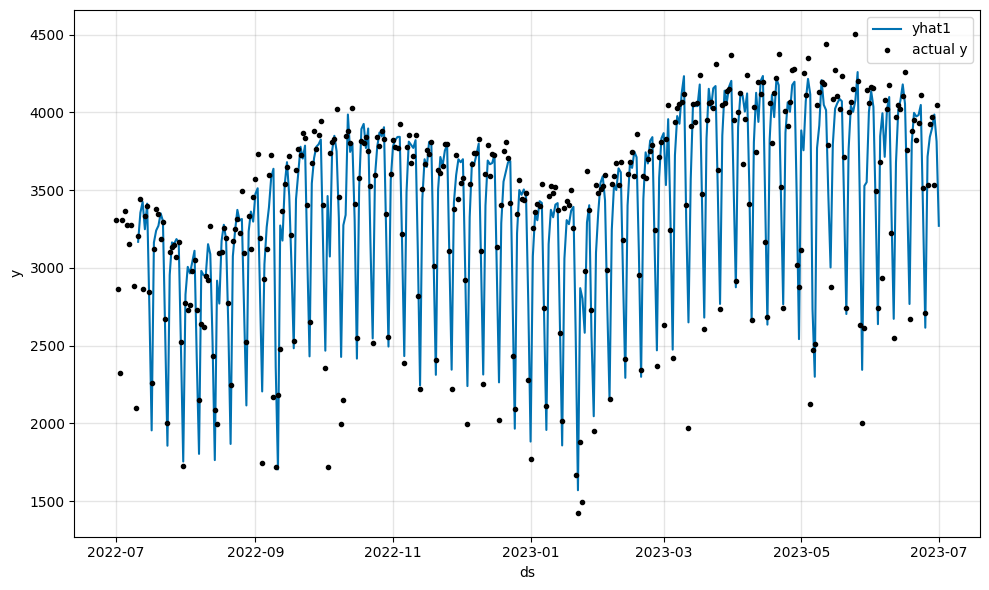

In [20]:
# 예측용으로 미래로부터 365일까지의 새로운 데이터프레임 생성, 
# n_historic_predictions는 과거 데이터도 포함됨
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=365)

# 미래 예측
forecast = m.predict(df_future)

# 예측 시각화
m.plot(forecast)

In [10]:
# 모델과 예측
m = NeuralProphet(
    # 변화점 변경 비활성화
    n_changepoints=0,
    # 계절성 구성요소 비활성화
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
# plotly 라이브러리를 통한 시각화
m.set_plotting_backend("plotly")
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

Finding best initial lr:   0%|          | 0/216 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 23it [00:00, ?it/s]

In [12]:
m.plot_parameters(components=["trend"])

Finding best initial lr:   0%|          | 0/216 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 23it [00:00, ?it/s]

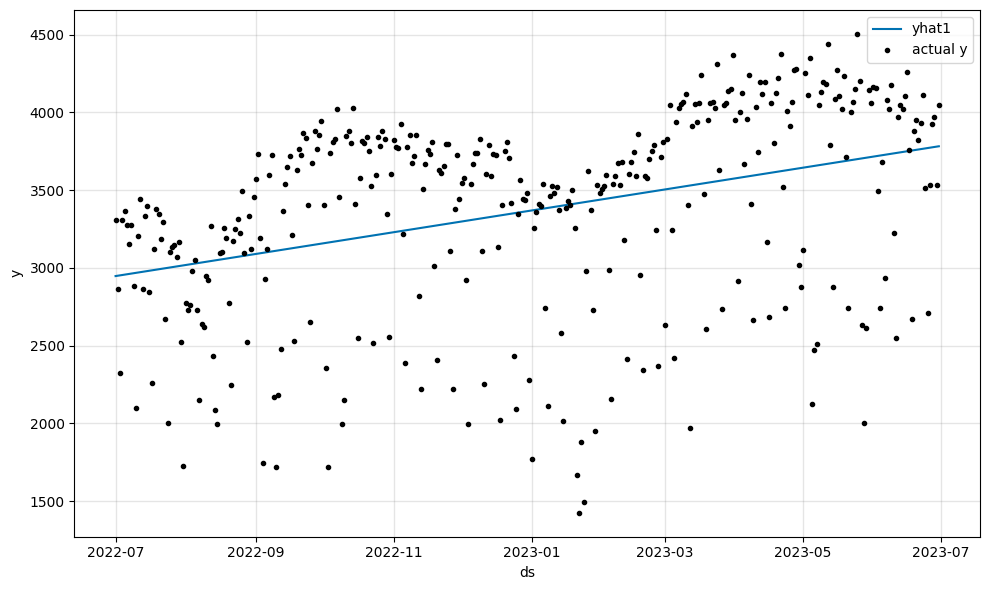

In [17]:
# Model and prediction
m = NeuralProphet(
#     Use default number of change trendpoints (10)
    n_changepoints=0,
#     Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

Finding best initial lr:   0%|          | 0/216 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 23it [00:00, ?it/s]

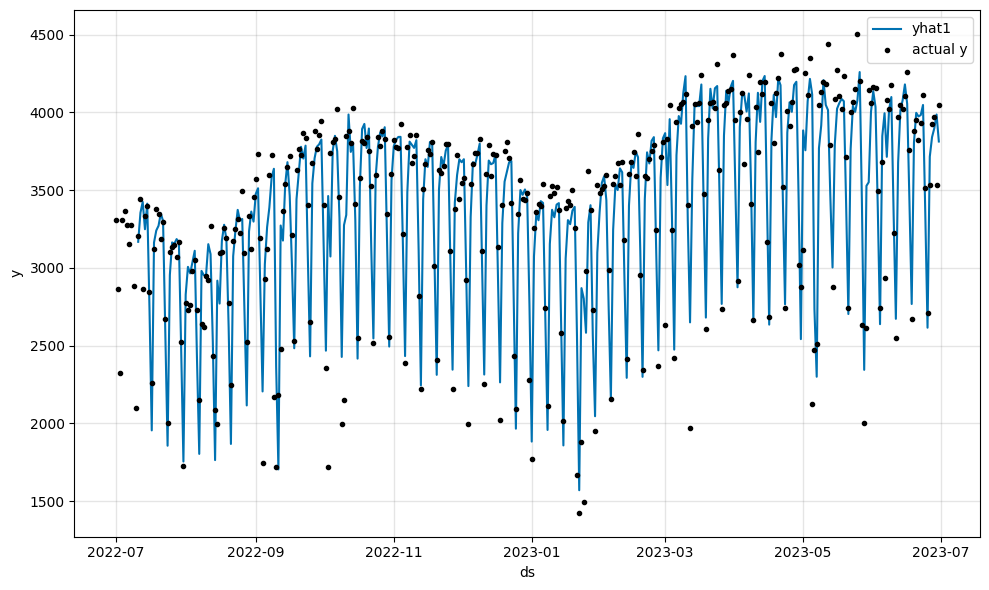

In [19]:
# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=10,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=10,
)
m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

Predicting: 23it [00:00, ?it/s]

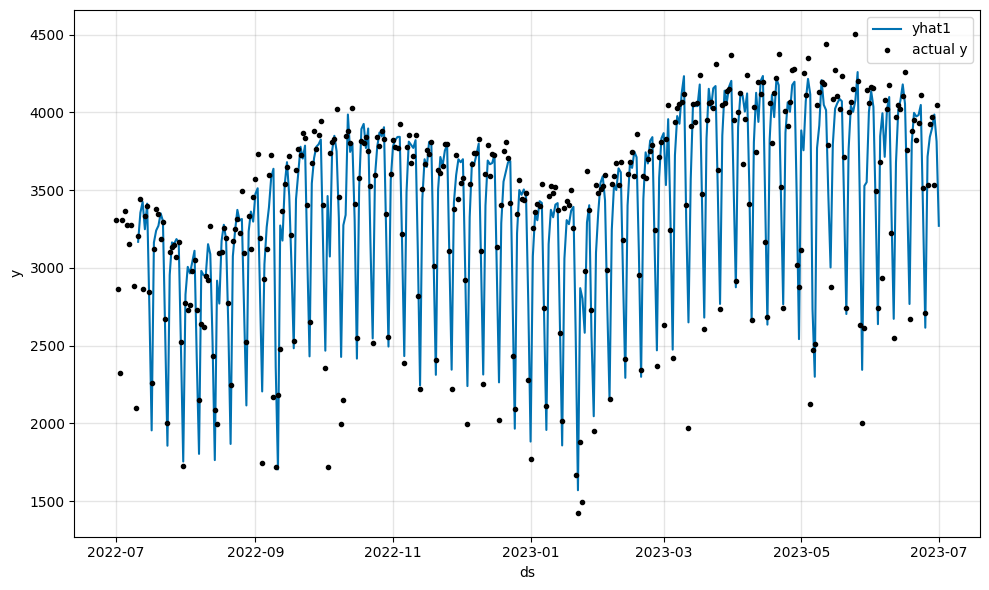

In [21]:
# 예측용으로 미래로부터 365일까지의 새로운 데이터프레임 생성, 
# n_historic_predictions는 과거 데이터도 포함됨
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=365)

# 미래 예측
forecast = m.predict(df_future)

# 예측 시각화
m.plot(forecast)

In [107]:
data2[data2['역명']=='주안국가산단']

통행일자      역명  이용인원
33581  2022-07-01  주안국가산단  2927
33583  2022-07-02  주안국가산단   673
33585  2022-07-03  주안국가산단   363
33587  2022-07-04  주안국가산단  3002
33589  2022-07-05  주안국가산단  3014
...           ...     ...   ...
34301  2023-06-26  주안국가산단  2835
34303  2023-06-27  주안국가산단  2936
34305  2023-06-28  주안국가산단  2930
34307  2023-06-29  주안국가산단  2854
34309  2023-06-30  주안국가산단  2924

[365 rows x 3 columns]

In [108]:
ty_list=['부평시장',
'가정',
'계산',
'테크노파크',
'인천터미널',
'주안국가산단',
'작전']

In [99]:
data['역명'].unique()

array(['계양', '귤현', '박촌', '임학', '계산', '경인교대입구', '작전', '갈산', '부평구청', '부평시장',
       '부평', '동수', '부평삼거리', '간석오거리', '인천시청', '예술회관', '인천터미널', '문학경기장',
       '선학', '신연수', '원인재', '동춘', '동막', '캠퍼스타운', '테크노파크', '지식정보단지',
       '인천대입구', '센트럴파크', '국제업무지구', '송도달빛축제공원', '검단오류', '왕길', '검단사거리',
       '마전', '완정', '독정', '검암', '검바위', '아시아드경기장', '서구청', '가정', '가정중앙시장',
       '석남', '서부여성회관', '인천가좌', '가재울', '주안국가산단', '주안', '시민공원', '석바위시장',
       '석천사거리', '모래내시장', '만수', '남동구청', '인천대공원', '운연', '까치울', '부천종합운동장',
       '춘의', '신중동', '부천시청', '상동', '삼산체육관', '굴포천', '7호선 부평구청', '산곡'],
      dtype=object)